In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./Bitok.csv",parse_dates=True,
                   index_col = "date")

In [3]:
df.head()

,unix,symbol,open,high,low,close,Volume BTC,Volume USD
date,,,,,,,,
2024-06-11 00:00:00,1718064000,BTC/USD,69506.0,69546.0,69492.0,69506.0,1.876120,1.304016e+05
2024-06-10 23:00:00,1718060400,BTC/USD,69479.0,69525.0,69373.0,69501.0,6.138612,4.266396e+05
2024-06-10 22:00:00,1718056800,BTC/USD,69572.0,69572.0,69388.0,69450.0,30.956863,2.149954e+06
2024-06-10 21:00:00,1718053200,BTC/USD,69600.0,69664.0,69510.0,69565.0,21.257427,1.478773e+06
2024-06-10 20:00:00,1718049600,BTC/USD,69488.0,69664.0,69330.0,69608.0,62.051907,4.319309e+06


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53251 entries, 2024-06-11 00:00:00 to 2018-05-15 06:00:00
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   unix        53251 non-null  int64  
 1   symbol      53251 non-null  object 
 2   open        53251 non-null  float64
 3   high        53251 non-null  float64
 4   low         53251 non-null  float64
 5   close       53251 non-null  float64
 6   Volume BTC  53251 non-null  float64
 7   Volume USD  53251 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 3.7+ MB


<Axes: xlabel='date'>

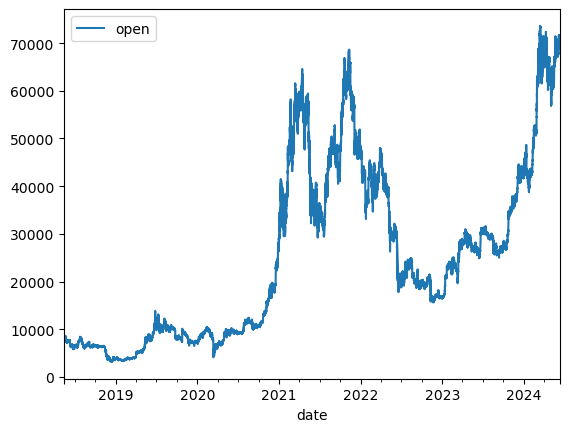

In [5]:
df = df[['open']]

df.plot()

In [6]:
data = df.sort_values(by='date')

In [7]:
def code_mean(data, cat_feature, real_feature):
    return dict(data.groupby(cat_feature)[real_feature].mean())

In [8]:
data.head()

,open
date,
2018-05-15 06:00:00,8733.86
2018-05-15 07:00:00,8740.99
2018-05-15 08:00:00,8739.00
2018-05-15 09:00:00,8728.49
2018-05-15 10:00:00,8708.32


In [9]:
from sklearn.model_selection import train_test_split

def preprocess_data(data, lag_start=5, lag_end=20, test_size=0.15):
  for i in range(lag_start,lag_end):
    data[f"lag_{i}"] = data["open"].shift(i)
  data = data.dropna()
  data["hour"] = data.index.hour
  # data["hour_average"] = list(map(code_mean(data,"hour","open").get,data.hour))
  # data.drop("hour",axis=1,inplace=True)
  X = data.drop("open",axis=1)
  y = data["open"]
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size,shuffle=False)

  return X_train, X_test, y_train, y_test

C:\Users\Admin\AppData\Local\Temp\ipykernel_10088\3394932194.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["hour"] = data.index.hour


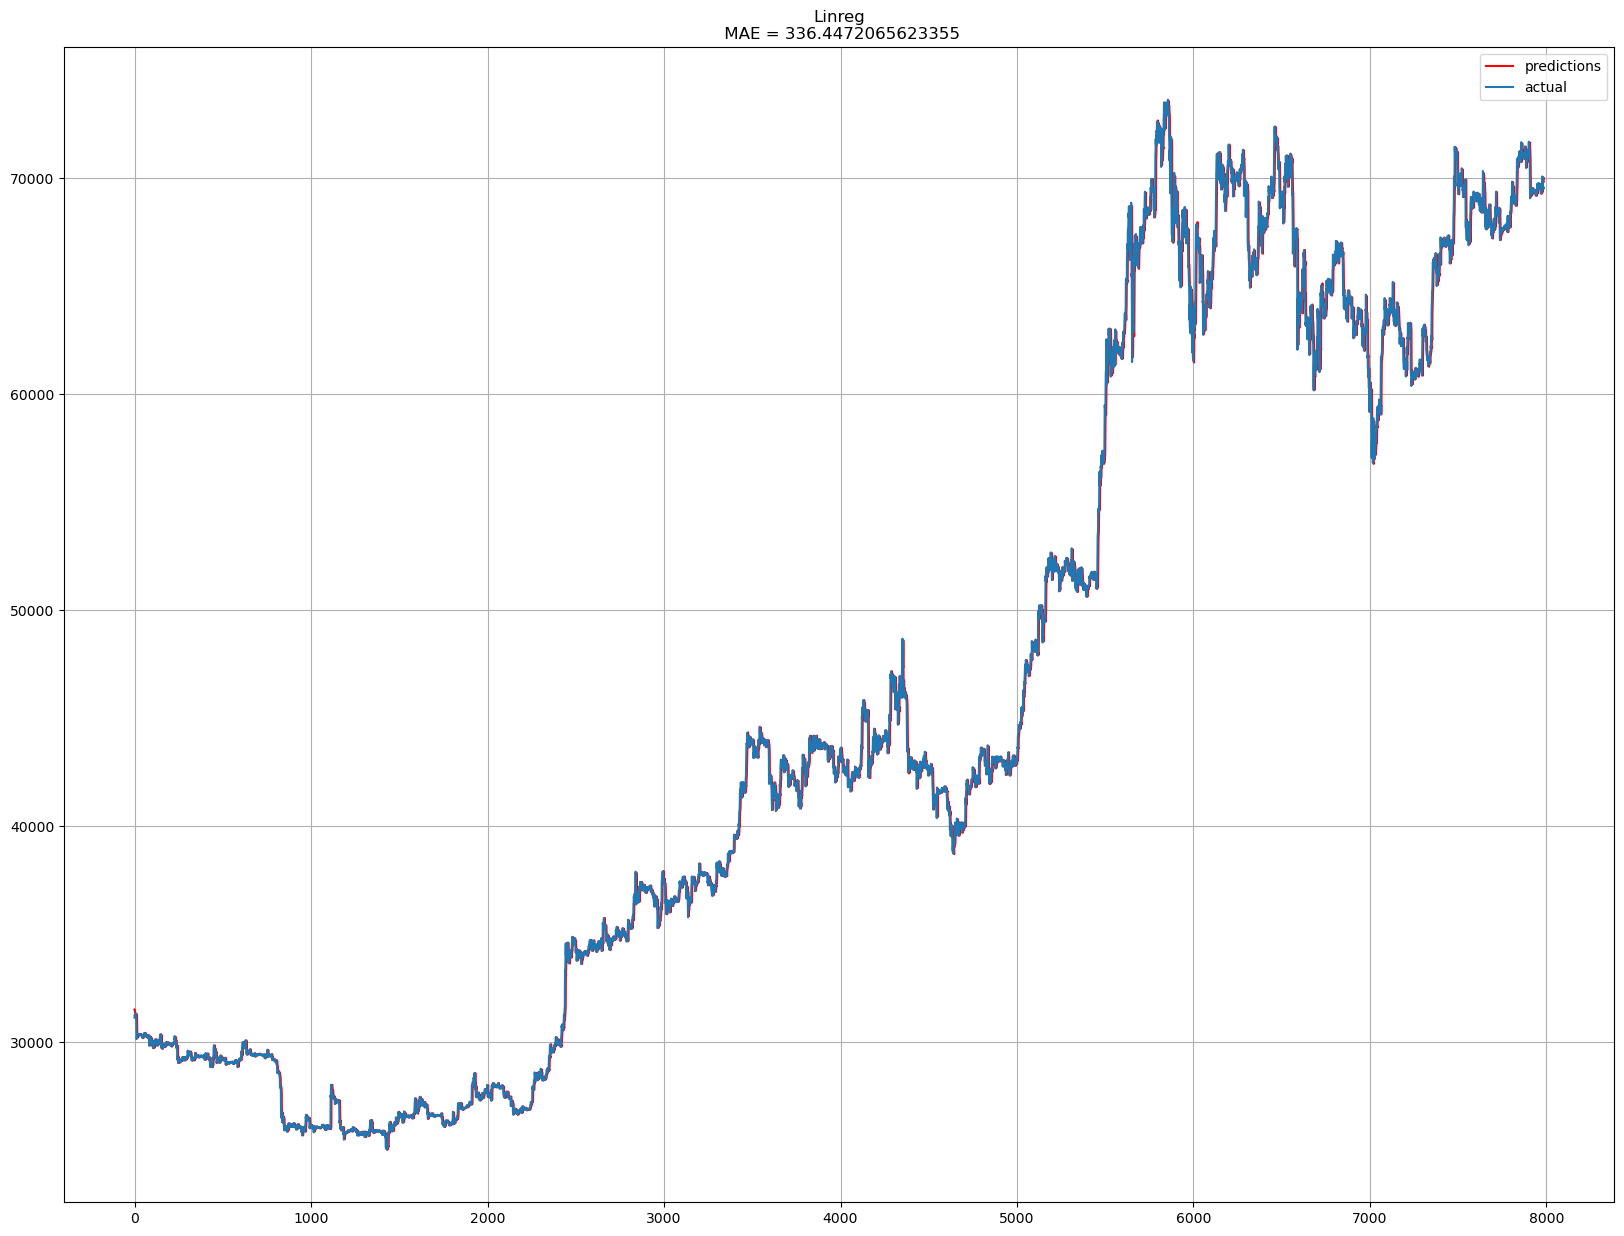

In [10]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
X_train,X_test,y_train,y_test = preprocess_data(data)
lr = LinearRegression()
lr.fit(X_train,y_train)
preds = lr.predict(X_test)

plt.figure(figsize=(20,15))
plt.plot(preds,"r",label="predictions")
plt.plot(y_test.values,label="actual")
plt.grid(True)
plt.legend(loc="best")
plt.title(f"Linreg\n MAE = {mean_absolute_error(preds,y_test)}");

In [11]:
data.tail()

,open,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19
date,,,,,,,,,,,,,,,,
2024-06-10 20:00:00,69488.0,69639.0,69377.0,69345.0,69451.0,69424.0,69429.0,69368.0,69265.0,69410.0,69540.0,69639.0,69603.0,69702.0,69604.0,69547.0
2024-06-10 21:00:00,69600.0,70058.0,69639.0,69377.0,69345.0,69451.0,69424.0,69429.0,69368.0,69265.0,69410.0,69540.0,69639.0,69603.0,69702.0,69604.0
2024-06-10 22:00:00,69572.0,69969.0,70058.0,69639.0,69377.0,69345.0,69451.0,69424.0,69429.0,69368.0,69265.0,69410.0,69540.0,69639.0,69603.0,69702.0
2024-06-10 23:00:00,69479.0,70028.0,69969.0,70058.0,69639.0,69377.0,69345.0,69451.0,69424.0,69429.0,69368.0,69265.0,69410.0,69540.0,69639.0,69603.0
2024-06-11 00:00:00,69506.0,69819.0,70028.0,69969.0,70058.0,69639.0,69377.0,69345.0,69451.0,69424.0,69429.0,69368.0,69265.0,69410.0,69540.0,69639.0


In [16]:
future_dates = pd.date_range(start=data.index[-1], periods=250, freq='H')

# Создание DataFrame для будущих данных
future_data = pd.DataFrame(index=future_dates)


In [17]:
for lag in range(5, 20):
    future_data[f"lag_{lag}"] = data['open'].shift(lag).values[-len(future_data):]

future_data['hour'] = future_data.index.hour
future_data = future_data.dropna()



In [18]:
future_data

,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,hour
2024-06-11 00:00:00,67902.0,68121.0,68171.0,68270.0,68423.0,68487.0,68521.0,68518.0,68440.0,68446.0,68330.0,68258.0,68380.0,68456.0,68648.0,0
2024-06-11 01:00:00,68282.0,67902.0,68121.0,68171.0,68270.0,68423.0,68487.0,68521.0,68518.0,68440.0,68446.0,68330.0,68258.0,68380.0,68456.0,1
2024-06-11 02:00:00,68327.0,68282.0,67902.0,68121.0,68171.0,68270.0,68423.0,68487.0,68521.0,68518.0,68440.0,68446.0,68330.0,68258.0,68380.0,2
2024-06-11 03:00:00,68612.0,68327.0,68282.0,67902.0,68121.0,68171.0,68270.0,68423.0,68487.0,68521.0,68518.0,68440.0,68446.0,68330.0,68258.0,3
2024-06-11 04:00:00,68044.0,68612.0,68327.0,68282.0,67902.0,68121.0,68171.0,68270.0,68423.0,68487.0,68521.0,68518.0,68440.0,68446.0,68330.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-21 05:00:00,69639.0,69377.0,69345.0,69451.0,69424.0,69429.0,69368.0,69265.0,69410.0,69540.0,69639.0,69603.0,69702.0,69604.0,69547.0,5
2024-06-21 06:00:00,70058.0,69639.0,69377.0,69345.0,69451.0,69424.0,69429.0,69368.0,69265.0,69410.0,69540.0,69639.0,69603.0,69702.0,69604.0,6
2024-06-21 07:00:00,69969.0,70058.0,69639.0,69377.0,69345.0,69451.0,69424.0,69429.0,69368.0,69265.0,69410.0,69540.0,69639.0,69603.0,69702.0,7
2024-06-21 08:00:00,70028.0,69969.0,70058.0,69639.0,69377.0,69345.0,69451.0,69424.0,69429.0,69368.0,69265.0,69410.0,69540.0,69639.0,69603.0,8


In [19]:
predictions = lr.predict(future_data)

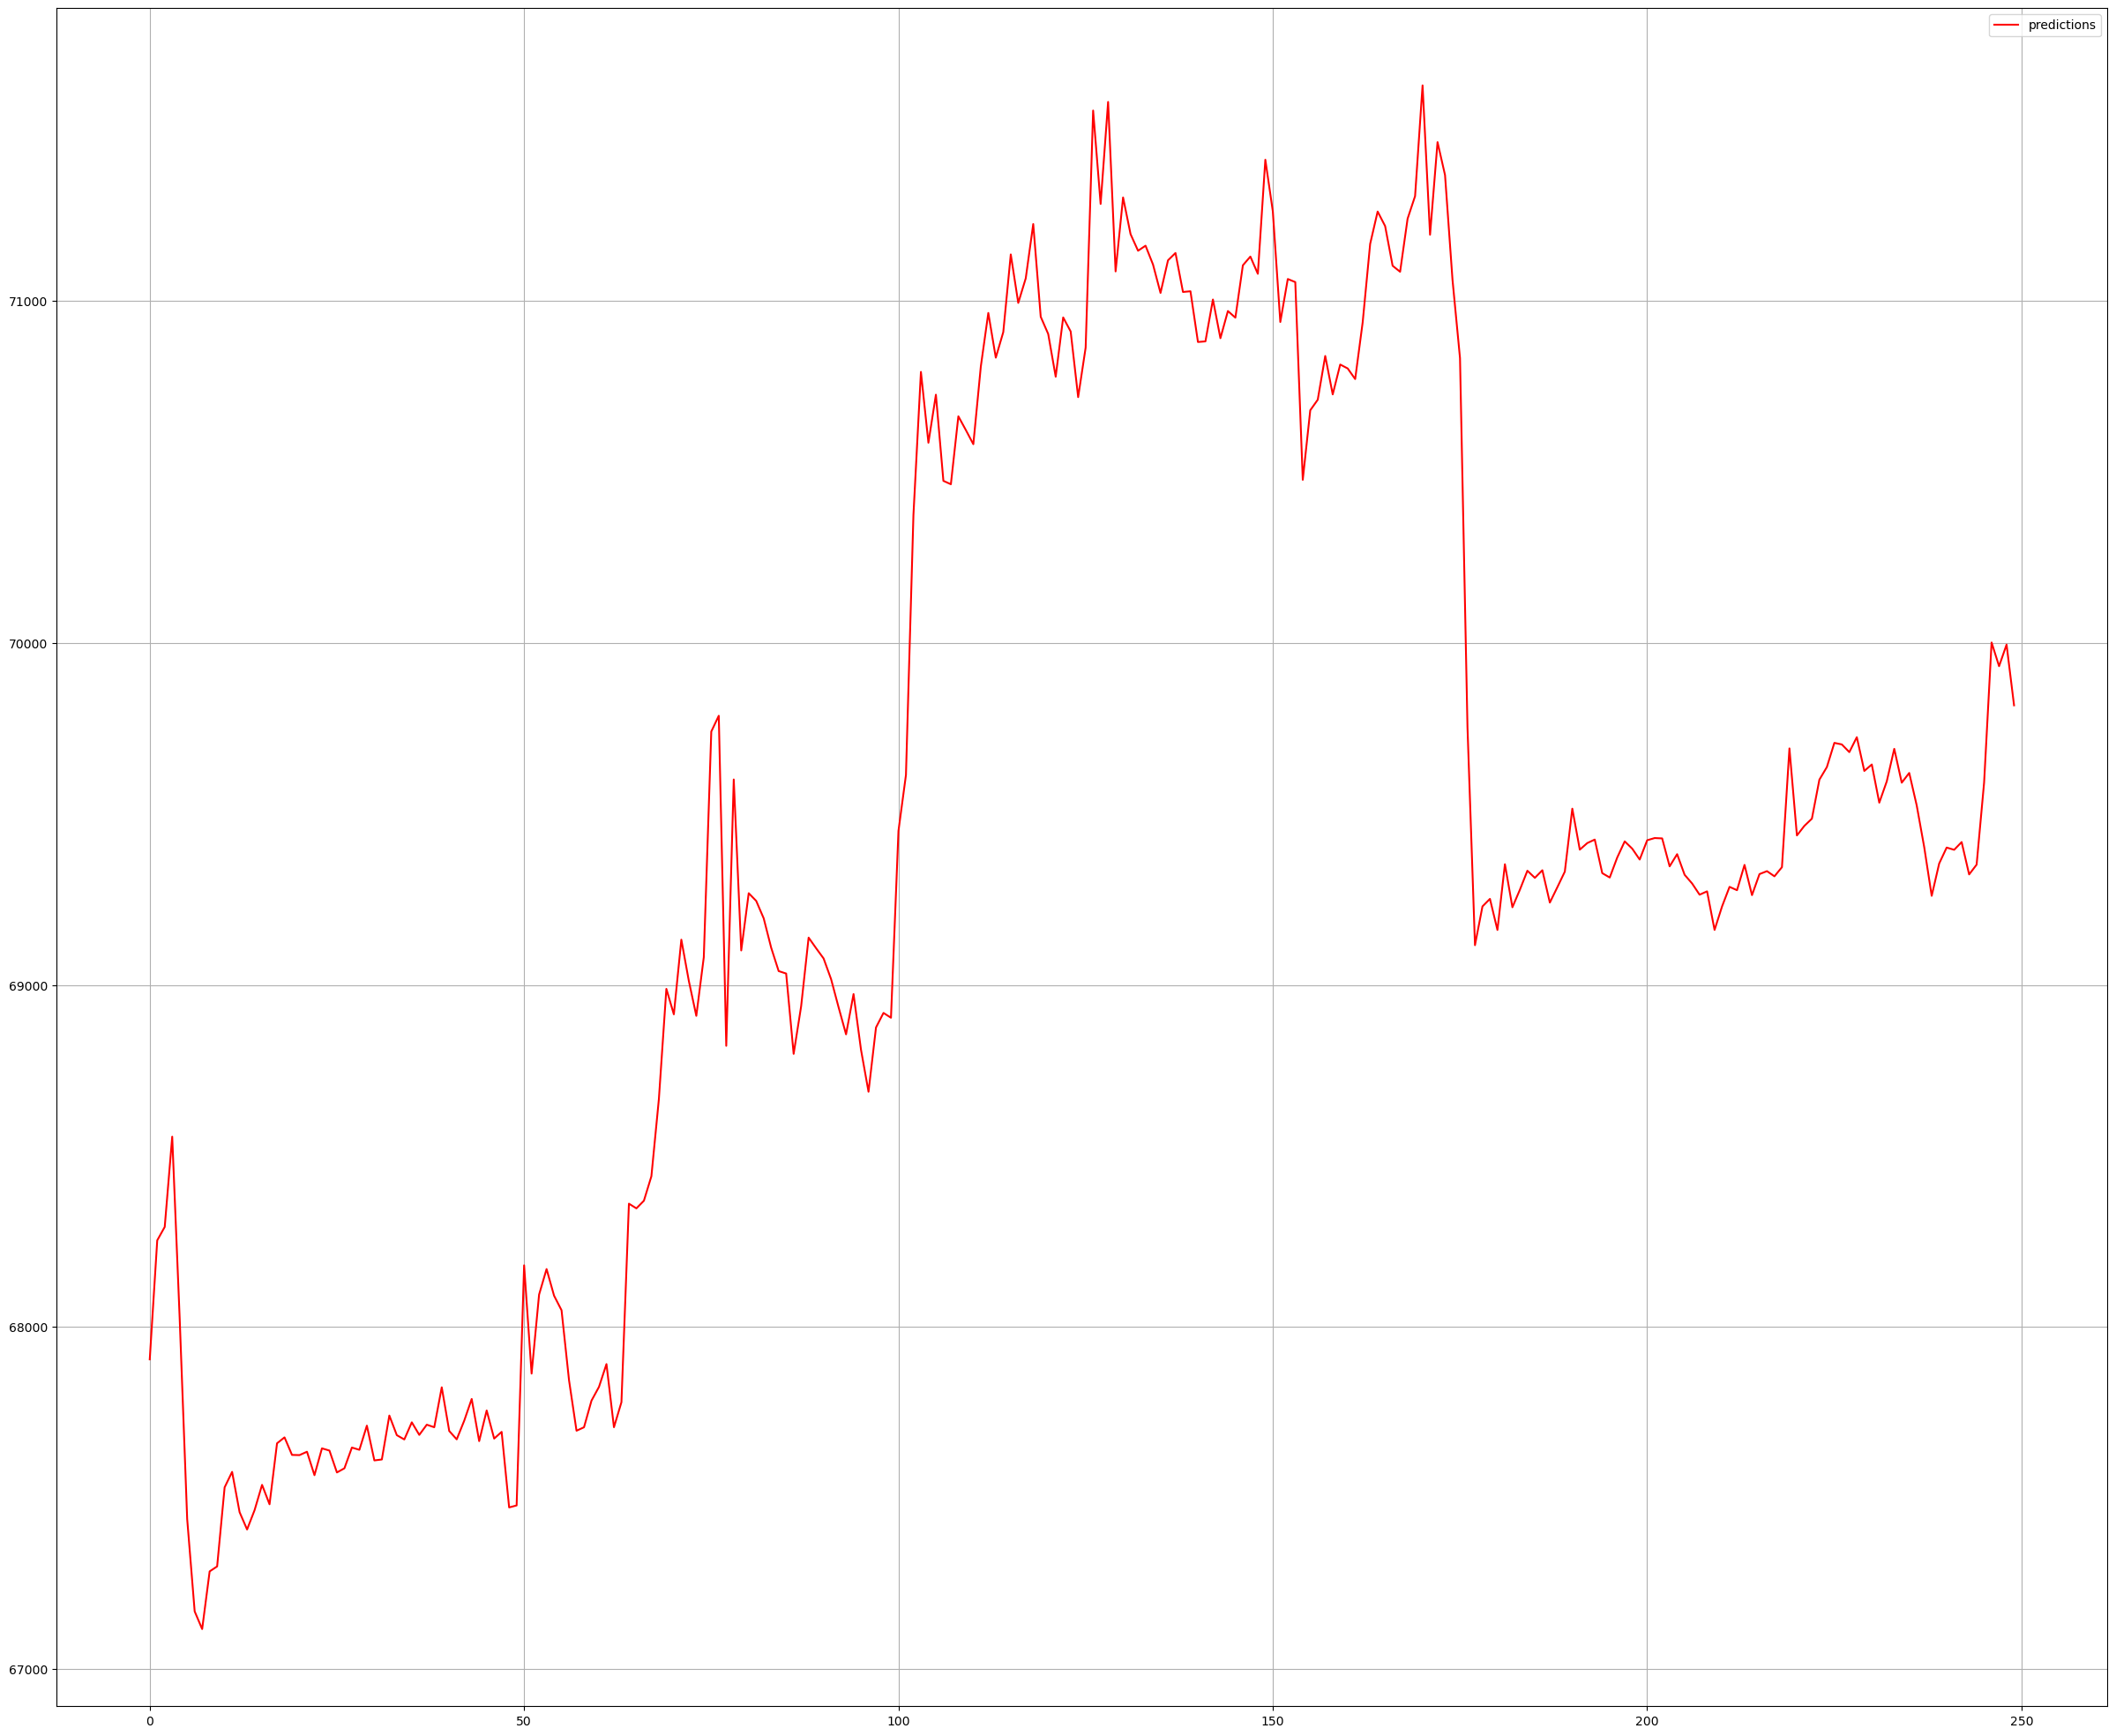

In [20]:
plt.figure(figsize=(30,25))
plt.plot(predictions,"r",label="predictions")
plt.grid(True)
plt.legend(loc="best")

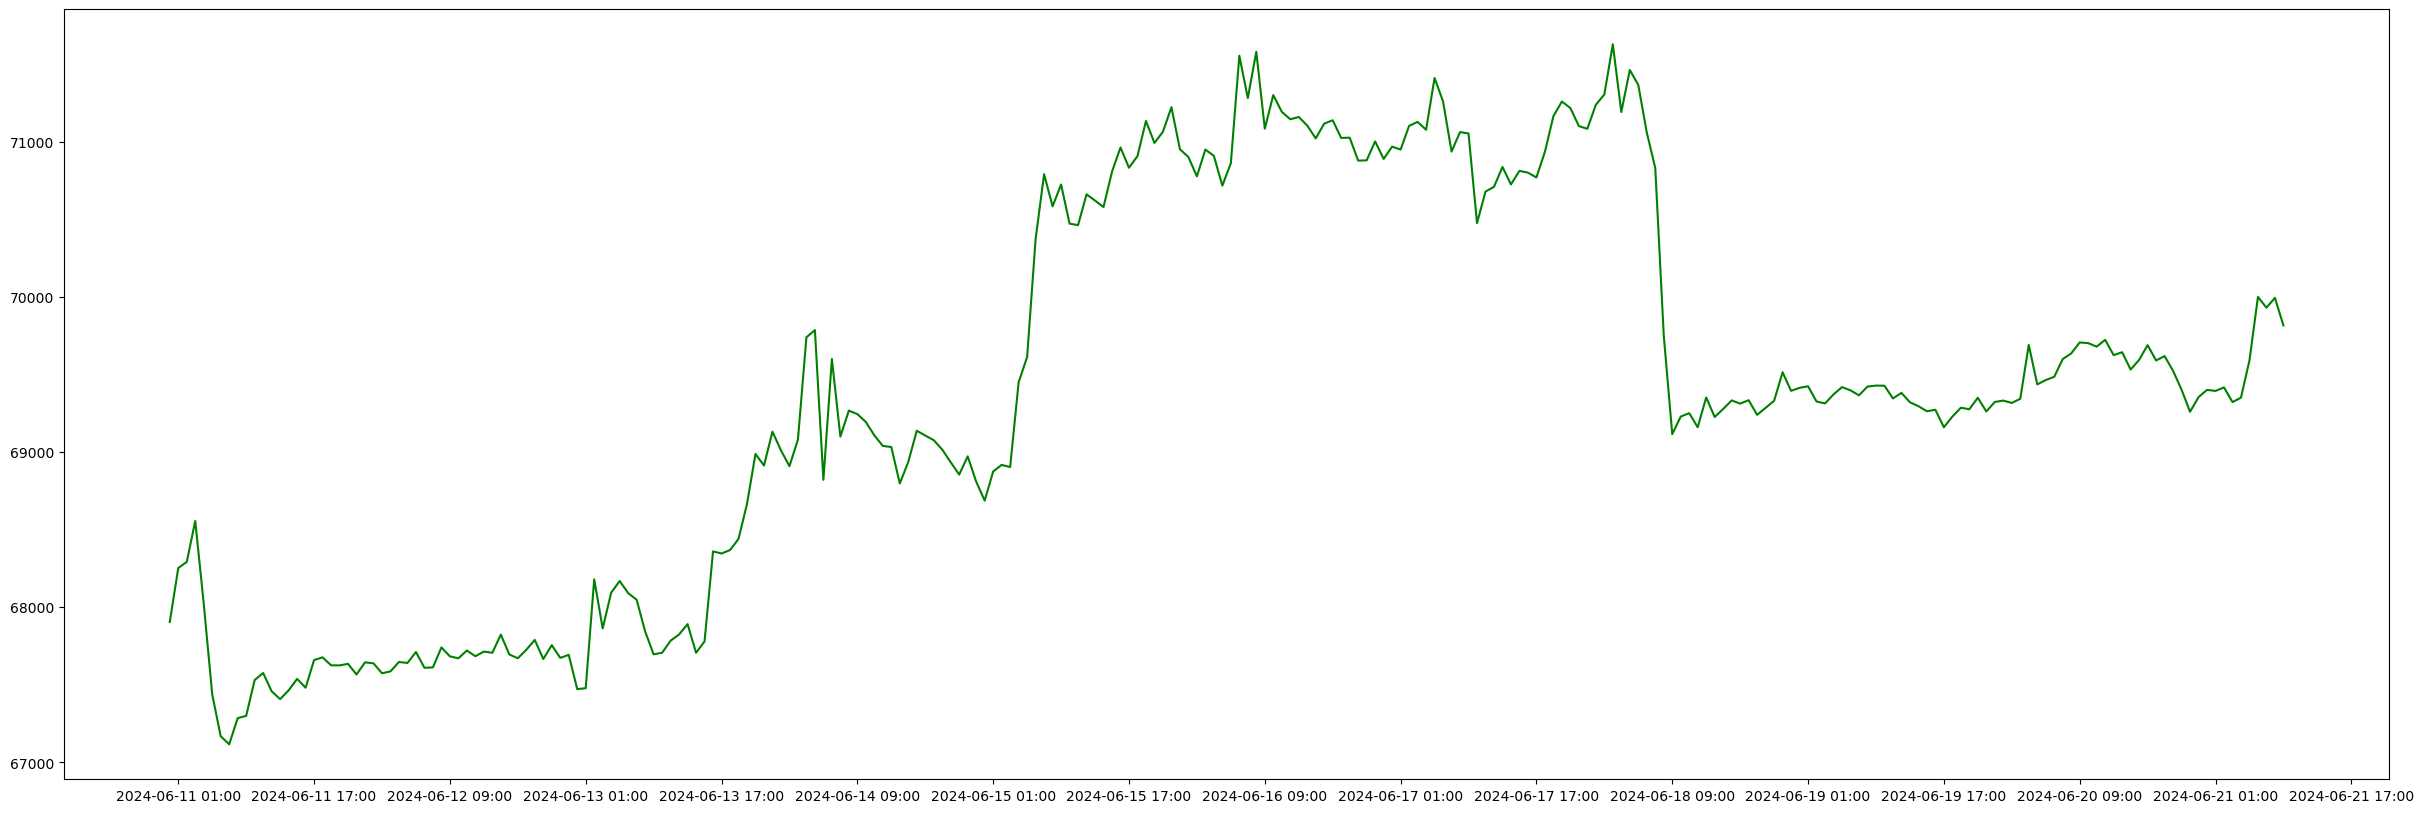

In [21]:
import matplotlib.dates as mdates
plt.figure(figsize=(30,10))
plt.plot(future_data.index, predictions, label="Future Predictions", color='green')
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=16)) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

In [22]:
dats = pd.date_range(start=data.index[-1], periods=250, freq='H')
summary = pd.DataFrame({"date": dats, "open": predictions})

In [23]:
summary

,date,open
0,2024-06-11 00:00:00,67905.080877
1,2024-06-11 01:00:00,68253.102847
2,2024-06-11 02:00:00,68292.369619
3,2024-06-11 03:00:00,68556.338846
4,2024-06-11 04:00:00,68023.767166
...,...,...
245,2024-06-21 05:00:00,69591.716993
246,2024-06-21 06:00:00,70001.444523
247,2024-06-21 07:00:00,69932.029940
248,2024-06-21 08:00:00,69995.221455


In [24]:
summary.to_csv('future_predictions.csv', index=False)